In [1]:
import pandas as pd
import numpy as np
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
import plotly.express as px 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

- A Perfect case of classification

In [2]:
iris_df = load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
px.scatter_3d(iris_df, x='sepal_length', y='sepal_width', z='petal_length', color='species',symbol='species')

In [4]:
X = iris_df.drop('species', axis=1)
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Another Dataset

In [5]:
penguins_df = load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [6]:
px.bar(penguins_df, x='species', color='species')

Class imbalance handling strategies

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
print("Original Dataset:")
print(penguins_df.groupby('species').size())

Original Dataset:
species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64


In [9]:
penguins_df.columns.tolist()

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [10]:
X = penguins_df[[
            'bill_length_mm',
            'bill_depth_mm',
            'flipper_length_mm',
            'body_mass_g'
            ]]
y = penguins_df['species']

In [11]:
imputer = SimpleImputer()
X = imputer.fit_transform(X)
cls_enc = LabelEncoder()
y = cls_enc.fit_transform(y)

In [12]:
X_resample, y_resample = SMOTE().fit_resample(X,y)

In [13]:
y.shape

(344,)

In [14]:
y_resample.shape

(456,)

<AxesSubplot:xlabel='0'>

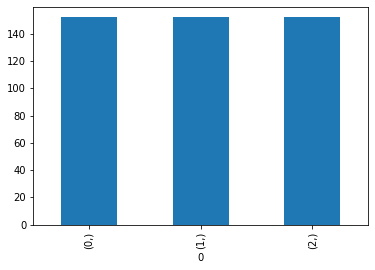

In [15]:
pd.DataFrame(y_resample).value_counts().plot(kind='bar')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample , test_size=0.2, random_state=42)

In [17]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[33  2  0]
 [ 4 23  0]
 [ 0  0 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        35
           1       0.92      0.85      0.88        27
           2       1.00      1.00      1.00        30

    accuracy                           0.93        92
   macro avg       0.94      0.93      0.93        92
weighted avg       0.94      0.93      0.93        92



In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[30  1  1]
 [ 0 16  0]
 [ 0  1 20]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.89      1.00      0.94        16
           2       0.95      0.95      0.95        21

    accuracy                           0.96        69
   macro avg       0.95      0.96      0.95        69
weighted avg       0.96      0.96      0.96        69



In [31]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler

In [32]:
X_resample, y_resample = ClusterCentroids().fit_resample(X,y)

In [25]:
y.shape

(344,)

In [36]:
y_resample.shape

(204,)

<AxesSubplot:xlabel='0'>

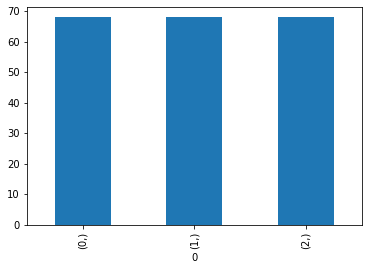

In [37]:
pd.DataFrame(y_resample).value_counts().plot(kind='bar')

In [33]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[30  1  1]
 [ 1 15  0]
 [ 0  1 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.88      0.94      0.91        16
           2       0.95      0.95      0.95        21

    accuracy                           0.94        69
   macro avg       0.93      0.94      0.94        69
weighted avg       0.94      0.94      0.94        69



In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[29  2  1]
 [ 1 15  0]
 [ 0  1 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.83      0.94      0.88        16
           2       0.95      0.95      0.95        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.93      0.93      0.93        69

